In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


# Pandas

## テストデータ作成


In [26]:
num = 1000

# ランダムな状態と品種を設定
states = ['正常', '警告', '異常']
varieties = ['A', 'B', 'C', 'D', 'E']

# 状態と品種をランダムに選択
random_states = np.random.choice(states, num)
random_varieties = np.random.choice(varieties, num)

# 異常度１と異常度２を正規分布からランダムに生成
random_anomaly1 = np.random.normal(loc=0, scale=1, size=num)
random_anomaly2 = np.random.normal(loc=0, scale=1, size=num)

# データフレームを作成
df = pd.DataFrame({
    'ファイル名': ['file'+str(i)+'.txt' for i in range(num)],
    'ファイルパス': ['/path/to/file'+str(i)+'.txt' for i in range(num)],
    '状態': random_states,
    '品種': random_varieties,
    '異常度１': random_anomaly1,
    '異常度２': random_anomaly2
})

# データフレームを表示
df

,ファイル名,ファイルパス,状態,品種,異常度１,異常度２
0,file0.txt,/path/to/file0.txt,異常,D,0.357863,0.443777
1,file1.txt,/path/to/file1.txt,警告,D,1.223864,-0.540405
2,file2.txt,/path/to/file2.txt,警告,C,0.970358,0.357295
3,file3.txt,/path/to/file3.txt,正常,C,2.039971,-0.075458
4,file4.txt,/path/to/file4.txt,正常,C,0.794675,1.629670
...,...,...,...,...,...,...
995,file995.txt,/path/to/file995.txt,異常,D,1.035551,-0.666000
996,file996.txt,/path/to/file996.txt,警告,B,-0.177893,-1.795449
997,file997.txt,/path/to/file997.txt,警告,C,-0.754718,-1.850263
998,file998.txt,/path/to/file998.txt,正常,D,1.373677,-0.154346


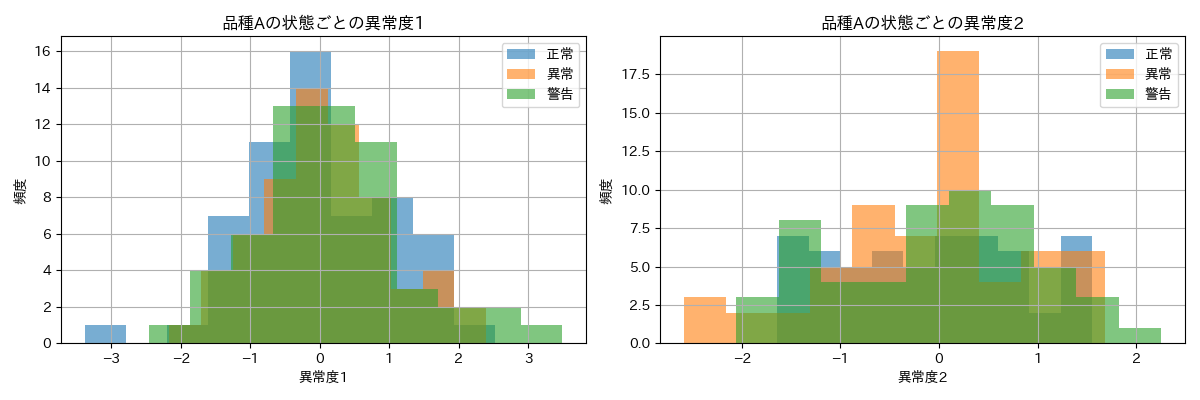

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df_A = df.query('品種 == "A"')

# 異常度１のヒストグラム
df_A.groupby('状態')['異常度１'].hist(alpha=0.6, bins=10, legend=True, ax=ax[0])
ax[0].set_xlabel('異常度1')
ax[0].set_ylabel('頻度')
ax[0].set_title('品種Aの状態ごとの異常度1')

# 異常度2のヒストグラム
df_A.groupby('状態')['異常度２'].hist(alpha=0.6, bins=10, legend=True, ax=ax[1])
ax[1].set_xlabel('異常度2')
ax[1].set_ylabel('頻度')
ax[1].set_title('品種Aの状態ごとの異常度2')

plt.tight_layout()
plt.show()